# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these three values for any sized list)

In [60]:
def mvs (data):
    
    s = sum(data)
    l = len(data)
    
    mean = s / l
    square_difference_sum = sum(map(lambda x : (x - mean) ** 2, data))
    
    variance = square_difference_sum / (l - 1)
    
    standard_deviation = variance ** 0.5
    
    return mean, variance, standard_deviation

In [61]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

mean, var, std = mvs(sales)
print(mean, var, std)

3052.714285714286 214387.90476190473 463.0204150595357


In [63]:
np.std(sales, ddof=1)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [64]:
def cv (data1, data2):
    
    s1 = sum(data1)
    s2 = sum(data2)
    
    l = len(data1)
    
    mean1 = s1 / l
    mean2 = s2 / l
    
    difference1 = [i - mean1 for i in data1]
    difference2 = [i - mean2 for i in data2]
    
    diff_product_sum = [difference1[i] * difference2[i] for i in range(l)]
    
    covariance = sum(diff_product_sum) / (l - 1)
    
    return covariance

In [65]:
customers = [127, 80, 105, 92, 120, 115, 93]

covar = cv(sales, customers)
print(covar)

7604.357142857142


In [66]:
import numpy as np
np.cov(sales, y=customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [67]:
_, _, salestd = mvs(sales)
_, _, customerstd = mvs(customers)
cor = covar / (salestd * customerstd)
print(cor)

0.9628339778148909


In [68]:
print(np.std(customers, ddof=1), customerstd)

17.057326313123664 17.057326313123664


In [69]:
np.corrcoef(sales, y=customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [70]:
import pandas as pd

In [111]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [112]:
df.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [113]:
df = df.drop(['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest', 'Unnamed: 0'], axis=1)

In [114]:
df = df.dropna()

In [115]:
df.dtypes

pclass              float64
survived            float64
age                 float64
sibsp               float64
parch               float64
fare                float64
body                float64
has_cabin_number      int64
dtype: object

In [116]:
df.values

array([[  1.        ,   0.        ,  30.        ,   1.        ,
          2.        , 151.55      , 135.        ,   1.        ],
       [  1.        ,   0.        ,  71.        ,   0.        ,
          0.        ,  49.5042    ,  22.        ,   0.        ],
       [  1.        ,   0.        ,  47.        ,   1.        ,
          0.        , 227.525     , 124.        ,   1.        ],
       [  1.        ,   0.        ,  25.        ,   0.        ,
          0.        ,  26.        , 148.        ,   0.        ],
       [  1.        ,   0.        ,  48.        ,   0.        ,
          0.        ,  50.4958    , 208.        ,   1.        ],
       [  1.        ,   0.        ,  36.        ,   1.        ,
          0.        ,  78.85      , 172.        ,   1.        ],
       [  1.        ,   0.        ,  70.        ,   1.        ,
          1.        ,  71.        , 269.        ,   1.        ],
       [  1.        ,   0.        ,  50.        ,   1.        ,
          0.        , 106.425    

In [120]:
# None of these number are right, but oh well
np.array([
    [
        cv(df[i].values, df[j].values)
        for j in df.columns
    ]     
    for i in df.columns
])

array([[ 7.22619048e-01,  0.00000000e+00, -5.85423707e+00,
         4.49579832e-02,  6.40056022e-02, -2.13144068e+01,
        -3.60945378e+00, -2.52661064e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-5.85423707e+00,  0.00000000e+00,  1.96811725e+02,
        -2.09817981e+00, -1.97125951e-01,  1.60509930e+02,
         6.17051814e+01,  2.59326356e+00],
       [ 4.49579832e-02,  0.00000000e+00, -2.09817981e+00,
         8.00840336e-01,  1.68907563e-01,  8.32629349e+00,
        -8.48697479e+00, -1.84873950e-02],
       [ 6.40056022e-02,  0.00000000e+00, -1.97125951e-01,
         1.68907563e-01,  7.25770308e-01,  5.14016660e+00,
         4.51134454e+00,  1.62464986e-02],
       [-2.13144068e+01,  0.00000000e+00,  1.60509930e+02,
         8.32629349e+00,  5.14016660e+00,  1.81052342e+03,
        -1.79164684e+02,  1.01172689e+01],
       [-3.60945378e+00,  0.000000

In [92]:
np.cov(df)

array([[  3792.44194444,    886.34668444,   4719.55847222, ...,
         -1325.839375  ,  -1016.46644056,  -1430.11576389],
       [   886.34668444,    682.3118464 ,   1300.42594222, ...,
          -625.4623575 ,   -800.0635311 ,   -762.93329639],
       [  4719.55847222,   1300.42594222,   6321.01048611, ...,
         -2467.2915625 ,  -2169.95874528,  -2569.99225694],
       ...,
       [ -1325.839375  ,   -625.4623575 ,  -2467.2915625 , ...,
        185612.965     , 186642.87858   , 186516.84625   ],
       [ -1016.46644056,   -800.0635311 ,  -2169.95874528, ...,
        186642.87858   , 187832.5023414 , 187605.10764111],
       [ -1430.11576389,   -762.93329639,  -2569.99225694, ...,
        186516.84625   , 187605.10764111, 187470.25527778]])

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

$\perp$

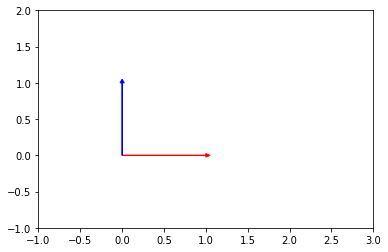

In [124]:
import matplotlib.pyplot as plt

ihat = [1, 0]
jhat = [0, 1]

plt.xlim(-1,3)          
plt.ylim(-1,2)

plt.arrow(0, 0, ihat[0], ihat[1], head_width=.05, head_length=0.05, color = 'r')
plt.arrow(0, 0, jhat[0], jhat[1], head_width=.05, head_length=0.05, color = 'b')

plt.show();

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [125]:
a = [-5, 3, 7]
b = [ 6,-8, 2]

sum(map(lambda x, y: x * y, a, b))

# They are not orthogonal, as the dot product of the two vectors is not zero.

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [129]:
2**2 * -15**2 * 6**2 * 20**2

-12960000

In [131]:
2 * 2 + -15 * -15 + 6 * 6 + 20 * 20

665

In [132]:
c = [2, -15, 6, 20]

np.array([[i * j for j in c] for i in c])

# They're all the equivalent of squaring in their respective contexts?

array([[   4,  -30,   12,   40],
       [ -30,  225,  -90, -300],
       [  12,  -90,   36,  120],
       [  40, -300,  120,  400]])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$$d =
\begin{bmatrix}
7 \\
12
\end{bmatrix}
= 7
\begin{bmatrix}
1 \\
0
\end{bmatrix}
+ 12
\begin{bmatrix}
0 \\
1
\end{bmatrix}
$$
$$e =
\begin{bmatrix}
2 \\
11 \\
-8
\end{bmatrix}
= 2
\begin{bmatrix}
1 \\
0 \\
0
\end{bmatrix}
+ 11
\begin{bmatrix}
0 \\
1 \\
0
\end{bmatrix}
+ -8
\begin{bmatrix}
0 \\
0 \\
1
\end{bmatrix}
$$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [135]:
f = np.array([4, 12, 11, 9, 2])
fmag = (sum(map(lambda x : x ** 2, f))) ** 0.5

f = f / fmag
f

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

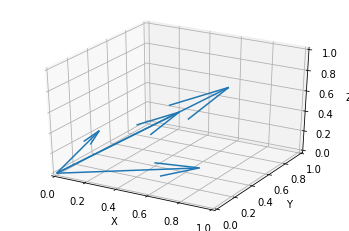

In [142]:
from mpl_toolkits.mplot3d import Axes3D

yellow = [.5, .5, .5]
red = [.7, .7, .7]
blue = [.1, .3, .3]
green = [.8, .2, .2]

vectors = np.array([[0, 0, 0] + yellow, 
                    [0, 0, 0] + red,
                    [0, 0, 0] + blue,
                    [0, 0, 0] + green])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

$g$ and $h$ are linearly dependent, so the span is only along the line created by both vectors, $y=2x$.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [143]:
lmn = np.array([[ 1, 2, 3],
                [ 0, 1, 5],
                [ 0, 0, 1]])
# Row reduction shows that these form a basis for R3, I think

-19.999999999999996

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



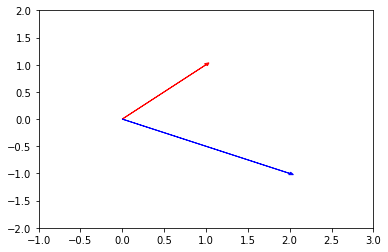

In [144]:
import matplotlib.pyplot as plt

ihat = [1, 1]
jhat = [0, 1]

plt.xlim(-1,3)          
plt.ylim(-1,2)

plt.arrow(0, 0, ihat[0], ihat[1], head_width=.05, head_length=0.05, color = 'r')
plt.arrow(0, 0, jhat[0], jhat[1], head_width=.05, head_length=0.05, color = 'b')

plt.show();

## 6.2 What does it mean to form a basis?

A basis is a set of linearly independent vectors that span the entire space you are working with.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

$$
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix} \rightarrow \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
0 & 0  & -10
\end{bmatrix} \rightarrow \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
0 & 0  & -10
\end{bmatrix} \rightarrow \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 0 \\
0 & 0  & -10
\end{bmatrix} \rightarrow \begin{bmatrix} 
1 & 0 & 0 \\
 0 & 2 & 0 \\
0 & 0  & -10
\end{bmatrix}
$$
The Rank of $P$ is 3.

## 7.2 What does the rank of a matrix tell us?

It tells us the number of linearly independent rows / columns. This also somewhat determines the span.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

[0.5 1.5]


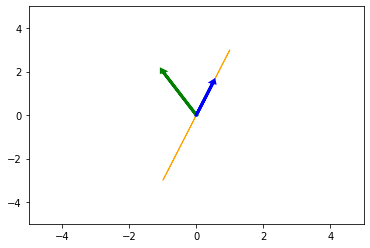

In [167]:
import matplotlib.pyplot as plt

v = np.array([1, 3])

w = np.array([-1, 2])
projLw = v * np.dot(w, v) / np.dot(v, v)
print(projLw)


plt.xlim(-5,5)          
plt.ylim(-5,5)

plt.arrow(-v[0], -v[1], v[0] * 2, v[1] * 2, color = 'orange')
plt.arrow(0, 0, w[0], w[1], head_width=.1, head_length=0.1, linewidth=3, color = 'g')
plt.arrow(0, 0, projLw[0], projLw[1], head_width=.1, head_length=0.1, linewidth=3, color = 'b')

plt.show();

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [168]:
def project(x, y, linevector):
    return np.array([
        np.dot([x[i], y[i]], linevector) * np.array(linevector) / np.dot(linevector, linevector)
        for i in range(len(x))
    ])

[[2.5 2.5]
 [3.  3. ]
 [6.  6. ]
 [1.5 1.5]
 [8.5 8.5]
 [3.  3. ]
 [6.5 6.5]]


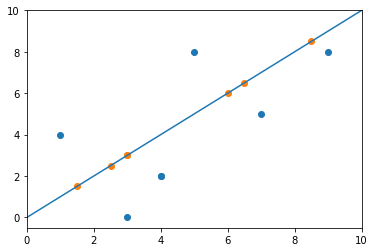

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)
projected = project(df.x, df.y, [1, 1])
print(projected)
df['projected_x'] = projected[:, 0]
df['projected_y'] = projected[:, 1]
plt.scatter(df.x, df.y)
plt.scatter(df.projected_x, df.projected_y)
plt.xlim(0, 10)
plt.ylim(-0.5, 10)
plt.plot([0, 10], [0, 10])

plt.show()